In [1]:
###reference:
    ###https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280


def concat_df(train_data,test_data):
    return pd.concat([train_data,test_data],sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:890],all_data.loc[891:].drop(['Survived'],axis=1)

In [2]:
import pandas as pd

train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

###JHU not necessary code???
#df_all=concat_df(train_data,test_data)

###JHU not necessary code???
#dfs=[train_data,test_data]

In [3]:
print("train_data_contains: "+str(len(train_data))+" row and "+str(len(train_data.columns))+" columns")
print("test_data_contains: "+str(len(test_data))+" row and "+str(len(test_data.columns))+" columns")

train_data_contains: 891 row and 12 columns
test_data_contains: 418 row and 11 columns


In [4]:
###JHU use simple code to do the same thing to avoid potential errors
###JHU and focus on your analysical logical, to do an exploratory aalysis
###JHU not just to follow they footsetps. logical

print("train_data.shape")
display(train_data.shape)

print("test_data.shape")
display(test_data.shape)

train_data.shape


(891, 12)

test_data.shape


(418, 11)

In [5]:
print("first_3_row_of_train_data")
display(train_data.head(1))
print("first_3_row_of_test_data")
display(test_data.head(1))

first_3_row_of_train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


first_3_row_of_test_data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [6]:
###JHU first we take a look at our data, df.shape and then
###JHU we trying to fillin the nulls, data preparing process

print("missing_values_in_train_data")
display(train_data.isnull().sum())
print("missing_value_in_test_data")
display(test_data.isnull().sum())

missing_values_in_train_data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

missing_value_in_test_data


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df_all=concat_df(train_data,test_data)


In [8]:
#### 2 data cleansing 
### 2.1 Age


In [9]:
print("missing_age_values_in_total_data_set: "+str(df_all['Age'].isnull().sum()))
print("missing_percentage: "+str(round(df_all['Age'].isnull().sum()/len(df_all)*100,0))+" %")

missing_age_values_in_total_data_set: 263
missing_percentage: 20.0 %


<AxesSubplot:ylabel='Frequency'>

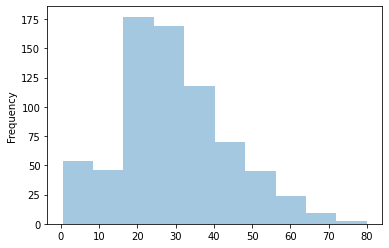

In [10]:
###JHU
import seaborn as sb

train_data['Age'].plot.hist(alpha=0.4)

###JHU we can see a un-normal distribution, since we lost many Age values
###JHU does that affect our job? should we fillin more young aged data???

<AxesSubplot:ylabel='Frequency'>

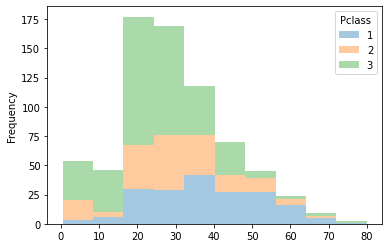

In [11]:
###JHU
train_data.pivot(columns='Pclass').Age.plot(kind='hist',stacked=True,alpha=0.4)

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

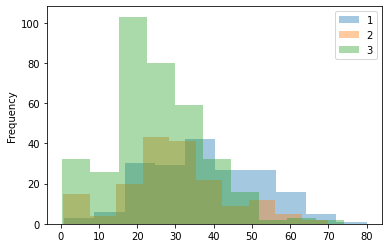

In [12]:
###JHU
train_data.groupby(['Pclass'])['Age'].plot.hist(alpha=0.4,stacked=True,legend=True)


<AxesSubplot:xlabel='Age', ylabel='Count'>

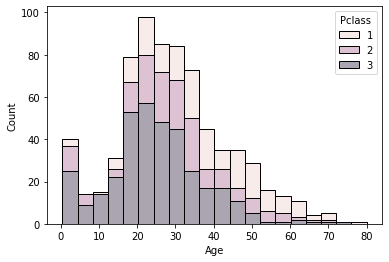

In [13]:
###JHU

sb.histplot(data=train_data,x="Age",hue="Pclass",multiple="stack",alpha=0.4)

In [14]:
print('median_for_Age_seperated_by_Pclass:')
display(train_data.groupby('Pclass')['Age'].median())

print('median_for_Age_seperated_by_Pclass_and_Sex:')
display(train_data.groupby(['Pclass','Sex'])['Age'].median())

print('bumber_of_cases:')
display(train_data.groupby(['Pclass','Sex'])['Age'].count())     #not value_counts

median_for_Age_seperated_by_Pclass:


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

median_for_Age_seperated_by_Pclass_and_Sex:


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

bumber_of_cases:


Pclass  Sex   
1       female     85
        male      101
2       female     74
        male       99
3       female    102
        male      253
Name: Age, dtype: int64

In [15]:
#replace the missing value with the medians of each group
###JHU learn the way to fill the null values in the dataset###

df_all['Age']=df_all.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))
df_all.sample(1)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
802,11.0,B96 B98,S,120.0,"Carter, Master. William Thornton II",2,803,1,male,1,1.0,113760


In [16]:
#### 2 data cleansing 
### 2.2 Fare


In [17]:
df_all.loc[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [18]:
#loc cases which are similiar to Mr.Thomas and use the median of fare to replace the missing for his data set
mr_thomas=df_all.loc[(df_all['Pclass']==3)&(df_all['SibSp']==0)&(df_all['Embarked']=='S')]['Fare'].median()       ################################################################
print(mr_thomas)

#
df_all.loc[df_all['Fare'].isnull(),'Fare']=mr_thomas

###JHU anywany we can wrote it more simple?

7.925


In [19]:
#### 2 data cleansing 
### 2.3 Cabin


In [20]:
display(train_data['Cabin'].unique())
print('there_are '+str(train_data['Cabin'].nunique())+' different_values_for_Cabin_and ' +str(train_data['Cabin'].isnull().sum())+' cases_are_missing')

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

there_are 147 different_values_for_Cabin_and 687 cases_are_missing


In [21]:

##print(train_data[train_data['Cabin'].isnull()])
#Then for removing all non-numeric values use to_numeric with parameter errors='coerce' - to replace non-numeric values to NaNs:
##train_data['Cabin'] = pd.to_numeric(train_data['Cabin'], errors='coerce')
#And for remove all rows with NaNs in column x use dropna:
##train_data = train_data.dropna(subset=['Cabin'])
#Last convert values to ints:
##train_data['Cabin'] = train_data['Cabin'].astype(int)


#for dataset in df_all:
    #dataset['Cabin'] = dataset['Cabin'].astype('int').str.slice(0,1)
    #dataset['Cabin']=dataset['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else s).astype(int)
#str.slice(0,1)
#df['purchase'].astype(str).astype(int)

#df_all['Cabin']=df_all.groupby(['Pclass','Fare'])['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else s)


#train_data.Cabin = train_data.Cabin.astype(int) 
#train_data.info()


      Age Cabin Embarked      Fare                        Name  Parch  \
557  42.0   NaN        C  227.5250         Robbins, Mr. Victor      0   
47   22.0   NaN        Q    7.7500   O'Driscoll, Miss. Bridget      0   
713  29.0   NaN        S    9.4833  Larsson, Mr. August Viktor      0   

     PassengerId  Pclass     Sex  SibSp  Survived    Ticket Deck  
557          558       1    male      0       0.0  PC 17757  NaN  
47            48       3  female      0       1.0     14311  NaN  
713          714       3    male      0       0.0      7545  NaN  


Text(0.5, 0.98, 'Count_for_different_Deck')

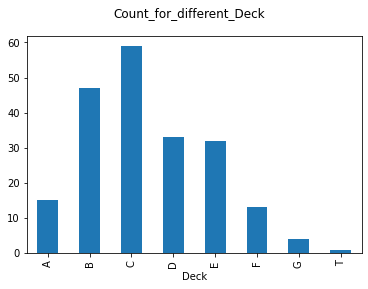

In [22]:
#keep all first letters of Cabin in new variable and use "M" for each missing
#####################################################################################################################################

df_all['Deck']=df_all['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else s)

#df_all['Deck']=df_all['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else df_all.groupby(['Pclass','Fare'])['Cabin'].median())
#df_all['Deck']=df_all(['Pclass','Fare'])['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')

print(df_all.sample(3))     #####################################################
import matplotlib.pyplot as pl

df_all.groupby('Deck')['Survived'].count().plot(kind='bar')
pl.suptitle('Count_for_different_Deck')


#df_all[['Deck','Survived']].groupby('Deck')['Survived'].mean().plot(kind='bar')
#pl.suptitle('Survival_rates_for_different_cabines')

Text(0.5, 0.98, 'Survival_mean_for_different_Deck')

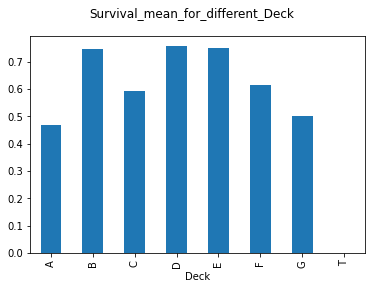

In [23]:
df_all.groupby('Deck')['Survived'].mean().plot(kind='bar')
pl.suptitle('Survival_mean_for_different_Deck')


In [24]:
############################################################################################################################# cut Fare feature into sever bins
#df_all_1=df_all
#df_all_1['Fare']=pd.cut(df_all_1['Fare'],5,labels=["<102","<204","<307","<409","<512"])

#df_all_1['Fare'].value_counts()

#df_all_1.groupby('Fare')['Survived'].count().plot(kind='bar')

<AxesSubplot:>

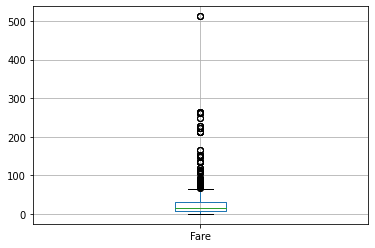

In [25]:
############################################################################################################################
#df_all['Fare'] = df_all['Fare'].astype(str)
df_all.boxplot(column=['Fare'])   ###,figsize=(15,7))


Pclass  Fare  
1       <7.8      2.0
        <10.5     NaN
        <21.5     NaN
        <41.5     3.0
        <512.3    3.0
2       <7.8      NaN
        <10.5     6.0
        <21.5     4.0
        <41.5     6.0
        <512.3    NaN
3       <7.8      6.0
        <10.5     7.0
        <21.5     7.0
        <41.5     6.0
        <512.3    NaN
Name: Deck, dtype: float64

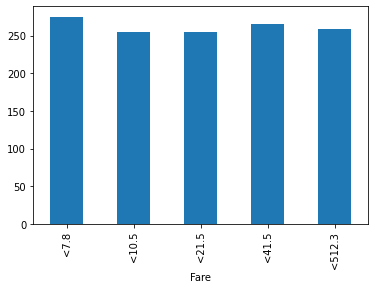

In [26]:
df_all['Fare']=pd.qcut(df_all['Fare'],5,labels=["<7.8","<10.5","<21.5","<41.5","<512.3"])
###JHU change the orignal ,labels=["<7.8","<10.5","<21.5","<41.5","<512.3"] to ,labels=["<102","<204","<307","<409","<512"]

df_all.groupby('Fare')['Fare'].count().plot(kind='bar')

# map letters to numbers so we could do mathematical operations, then we'll convert back to letters
deck_dict = {'A': 1,
'B': 2,
'C': 3,
'D': 4,
'E': 5,
'F': 6,
'G': 7,
'T': 8
}
df_all['Deck'] = df_all['Deck'].map(deck_dict)    ###############################################

# group by Pclass and Fare and make the median
median_deck = df_all.groupby(['Pclass','Fare'])  ##############################################
median_deck['Deck'].median()


<AxesSubplot:>

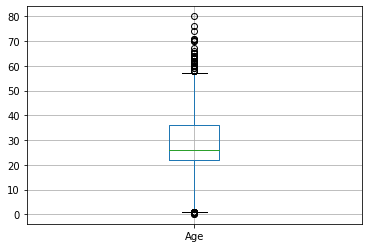

In [27]:
##############################################################################################################################

#df_all['Fare'] = df_all['Fare'].astype(str)
df_all.boxplot(column=['Age'])###,figsize=(15,7))


In [28]:
############################################################################################################################## Groupby Pclass Age

df_all['Age']=pd.cut(df_all['Age'],5,labels=["<16","<32","<48","<64","<80"])

# group by Pclass and Fare and make the median
median_deck_2 = df_all.groupby(['Pclass','Age'])
median_deck_2['Deck'].median()

df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          1309 non-null   category
 1   Cabin        295 non-null    object  
 2   Embarked     1307 non-null   object  
 3   Fare         1309 non-null   category
 4   Name         1309 non-null   object  
 5   Parch        1309 non-null   int64   
 6   PassengerId  1309 non-null   int64   
 7   Pclass       1309 non-null   int64   
 8   Sex          1309 non-null   object  
 9   SibSp        1309 non-null   int64   
 10  Survived     891 non-null    float64 
 11  Ticket       1309 non-null   object  
 12  Deck         295 non-null    float64 
dtypes: category(2), float64(2), int64(4), object(5)
memory usage: 115.6+ KB


In [29]:
############################################################################################################################### Fillin Cabin based on Pclass Fare

# Fill up the NaNs for the cabin based on the grouping above
df_all['Deck'] = median_deck['Deck'].transform(lambda x: x.fillna(x.median()))

df_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          1309 non-null   category
 1   Cabin        295 non-null    object  
 2   Embarked     1307 non-null   object  
 3   Fare         1309 non-null   category
 4   Name         1309 non-null   object  
 5   Parch        1309 non-null   int64   
 6   PassengerId  1309 non-null   int64   
 7   Pclass       1309 non-null   int64   
 8   Sex          1309 non-null   object  
 9   SibSp        1309 non-null   int64   
 10  Survived     891 non-null    float64 
 11  Ticket       1309 non-null   object  
 12  Deck         1264 non-null   float64 
dtypes: category(2), float64(2), int64(4), object(5)
memory usage: 115.6+ KB


/home/marry/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/marry/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/marry/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [30]:
print('null_value_in_Deck_column')
df_all['Deck'].isnull().sum()


null_value_in_Deck_column


45

Text(0.5, 0.98, 'Count_for_different_Deck_after_fillin_operation')

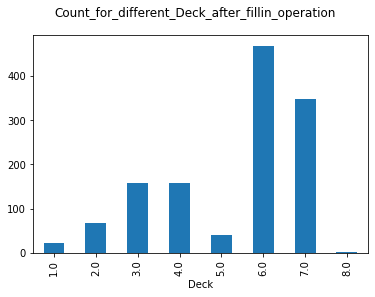

In [31]:

df_all.groupby('Deck')['Deck'].count().plot(kind='bar')
pl.suptitle('Count_for_different_Deck_after_fillin_operation')

###JHU Same As below code
#df_all.groupby('Deck')['Survived'].count().plot(kind='bar')

Text(0.5, 0.98, 'Survival_mean_for_different_Deck_after_fillin_operation')

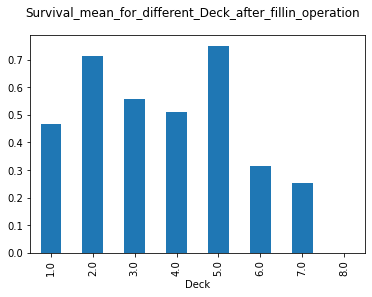

In [32]:
################################################################    6  7 

df_all.groupby('Deck')['Survived'].mean().plot(kind='bar')
pl.suptitle('Survival_mean_for_different_Deck_after_fillin_operation')


Text(0.5, 0.98, 'Count_for_different_Fare_Group')

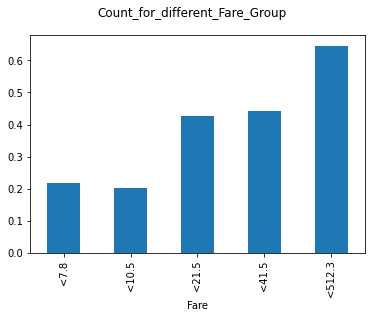

In [33]:

df_all.groupby('Fare')['Survived'].mean().plot(kind='bar')
pl.suptitle('Count_for_different_Fare_Group')

Text(0.5, 0.98, 'Count_for_different_Fare_Group')

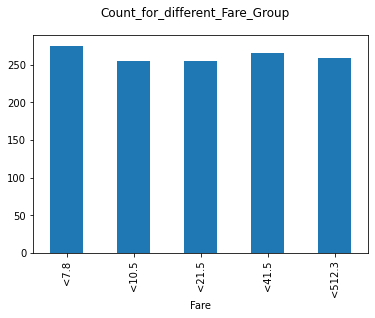

In [34]:

df_all.groupby('Fare')['Fare'].count().plot(kind='bar')
pl.suptitle('Count_for_different_Fare_Group')

In [35]:
display(df_all.head(5))

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,<32,NaN,S,<7.8,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,6.0
1,<48,C85,C,<512.3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,3.0
2,<32,NaN,S,<10.5,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,7.0
3,<48,C123,S,<512.3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,3.0
4,<48,NaN,S,<10.5,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,7.0


<AxesSubplot:xlabel='Deck'>

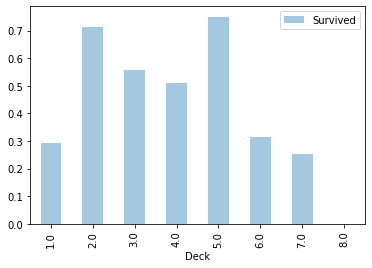

In [36]:
################################################################################################################################## trying median not mean

df_all['Deck'] = df_all['Deck'].fillna(1)
df_all.groupby('Deck')['Survived'].mean().plot(kind='bar',alpha=0.4,legend=True)

In [37]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          1309 non-null   category
 1   Cabin        295 non-null    object  
 2   Embarked     1307 non-null   object  
 3   Fare         1309 non-null   category
 4   Name         1309 non-null   object  
 5   Parch        1309 non-null   int64   
 6   PassengerId  1309 non-null   int64   
 7   Pclass       1309 non-null   int64   
 8   Sex          1309 non-null   object  
 9   SibSp        1309 non-null   int64   
 10  Survived     891 non-null    float64 
 11  Ticket       1309 non-null   object  
 12  Deck         1309 non-null   float64 
dtypes: category(2), float64(2), int64(4), object(5)
memory usage: 115.6+ KB


In [38]:
# revert back to letters
deck_letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
df_all['Deck'] = df_all['Deck'].apply(lambda x: deck_letters[int(x - 1)])      ######################################################
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,<32,NaN,S,<7.8,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,F
1,<48,C85,C,<512.3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,<32,NaN,S,<10.5,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,G
3,<48,C123,S,<512.3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C
4,<48,NaN,S,<10.5,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,G


In [39]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          1309 non-null   category
 1   Cabin        295 non-null    object  
 2   Embarked     1307 non-null   object  
 3   Fare         1309 non-null   category
 4   Name         1309 non-null   object  
 5   Parch        1309 non-null   int64   
 6   PassengerId  1309 non-null   int64   
 7   Pclass       1309 non-null   int64   
 8   Sex          1309 non-null   object  
 9   SibSp        1309 non-null   int64   
 10  Survived     891 non-null    float64 
 11  Ticket       1309 non-null   object  
 12  Deck         1309 non-null   object  
dtypes: category(2), float64(1), int64(4), object(6)
memory usage: 115.6+ KB


In [40]:
############################################# not use

#idx=df_all[df_all['Deck']=='T'].index
#df_all.loc[idx,'Deck']='A'

###JHU maybe we can category Deck based on the Survival_rate in above chart???

#
#df_all['Deck']=df_all['Deck'].replace(['E','B','C'],'EBC')
#df_all['Deck']=df_all['Deck'].replace(['D','A'],'DA')
#df_all['Deck']=df_all['Deck'].replace(['F','G','T'],'FGT')

df_all['Deck'].value_counts()                ################################################################   .value_counts

F    468
G    347
D    159
C    158
B     68
A     67
E     41
T      1
Name: Deck, dtype: int64

In [41]:
#### 2 data cleansing 
### 2.4 Embarked


In [42]:
df_all.loc[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
61,<48,B28,NaN,<512.3,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,B
829,<64,B28,NaN,<512.3,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,B


In [43]:
#check for passengers who were in passenger class 1, on deck abc and paid 80 or less for the tickets
#df_all.loc[(df_all['Pclass']==1)&(df_all['Fare']<=80)&(df_all['Deck']=='ABC')]['Embarked'].value_counts()

#not needed any more cause we can Google the value S

In [44]:
###JHU data 'S' were Google checked, no relationship with above figures

df_all.loc[df_all['Embarked'].isnull(),'Embarked']='S'

In [45]:
#### 2 data cleansing 
### 2.5 Conclusion


In [46]:
print("missing_in_all_data")
display(df_all.isnull().sum())


missing_in_all_data


Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Deck              0
dtype: int64

In [47]:
print("missing_in_train_data")
train_data.isnull().sum()

###JHU why still keeps null Age values in train_data, since we have replaced
###median Age value by Pclass and Sex in df_all???

missing_in_train_data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
#### 3 feature engineering 
### 3.1 Binning


In [49]:
#################################################################################################################################

df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          1309 non-null   category
 1   Cabin        295 non-null    object  
 2   Embarked     1309 non-null   object  
 3   Fare         1309 non-null   category
 4   Name         1309 non-null   object  
 5   Parch        1309 non-null   int64   
 6   PassengerId  1309 non-null   int64   
 7   Pclass       1309 non-null   int64   
 8   Sex          1309 non-null   object  
 9   SibSp        1309 non-null   int64   
 10  Survived     891 non-null    float64 
 11  Ticket       1309 non-null   object  
 12  Deck         1309 non-null   object  
dtypes: category(2), float64(1), int64(4), object(6)
memory usage: 115.6+ KB


In [50]:
################################################################################################################################# Borrowed to above binning

#df_all['Fare'] = df_all['Fare'].astype(str)
#df_all.boxplot(column=['Fare'])###,figsize=(15,7))

<AxesSubplot:xlabel='Fare', ylabel='Count'>

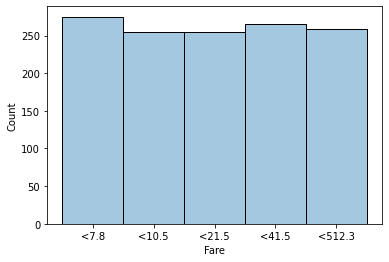

In [51]:
###JHU

sb.histplot(data=df_all,x="Fare",alpha=0.4)

In [52]:
################################################################################################################################# Borrowed to above binning

#df_all.boxplot(column=['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

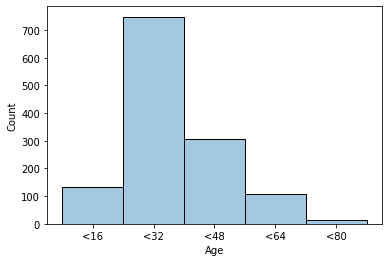

In [53]:
###JHU

sb.histplot(data=df_all,x="Age",alpha=0.4)

In [54]:
###df_all['Fare']=pd.qcut(df_all['Fare'],5)   #### we must run this first to get
###the label range then use label parameter to distribute into the bins

#df_all['Fare']=pd.qcut(df_all['Fare'],5,labels=["<7.8","<10.5","<21.5","<41.5","<512.3"])

#df_all['Age']=pd.cut(df_all['Age'],5,labels=["<16","<32","<48","<64","<80"])

print("For_Age,_each_category_has_a_different_number_of_cases:")
df_all['Age'].value_counts()

For_Age,_each_category_has_a_different_number_of_cases:


<32    748
<48    308
<16    134
<64    106
<80     13
Name: Age, dtype: int64

In [55]:
print("For_Fare,_each_category_has_nearly_a_same_number_of_cases:")
df_all['Fare'].value_counts()      ###########################################################################################################

For_Fare,_each_category_has_nearly_a_same_number_of_cases:


<7.8      275
<41.5     265
<512.3    259
<10.5     255
<21.5     255
Name: Fare, dtype: int64

In [56]:
###JHU
df_all[['Age','Survived']].sample(5)

,Age,Survived
996,<32,NaN
1082,<48,NaN
197,<48,0.0
773,<32,0.0
195,<64,1.0


In [57]:
#
df_all[['Age','Survived']].groupby('Age')['Survived'].mean()

#df_all.groupby('Age')['Survived'].mean()

Age
<16    0.550000
<32    0.336714
<48    0.412844
<64    0.434783
<80    0.090909
Name: Survived, dtype: float64

In [58]:
#
df_all[['Fare','Survived']].groupby('Fare')['Survived'].mean()

#df_all.groupby('Fare')['Survived'].mean()

Fare
<7.8      0.217877
<10.5     0.201087
<21.5     0.426901
<41.5     0.443243
<512.3    0.645349
Name: Survived, dtype: float64

Text(0.5, 0.98, 'Survival_rates_for_Age_categories')

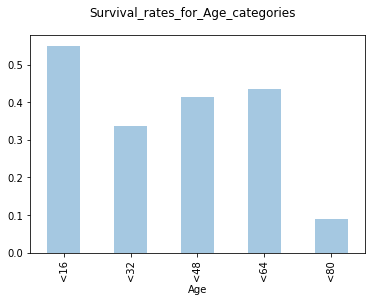

In [59]:
#
df_all[['Age','Survived']].groupby('Age')['Survived'].mean().plot(kind='bar',alpha=0.4)
pl.suptitle('Survival_rates_for_Age_categories')

#
#df_all.groupby('Age')['Survived'].mean().plot(kind='bar',alpha=0.4)
#pl.suptitle('Survival_rates_for_Age_categories')

Text(0.5, 0.98, 'Survivel_rate_for_Fare_categories')

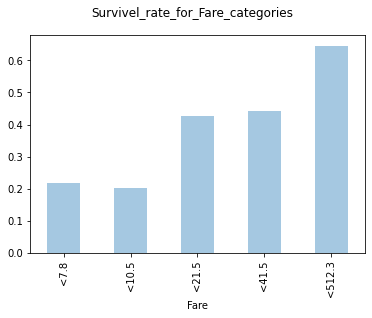

In [60]:
#
df_all[['Fare','Survived']].groupby('Fare')['Survived'].mean().plot(kind='bar',alpha=0.4)
pl.suptitle('Survivel_rate_for_Fare_categories')

#
#df_all.groupby('Fare')['Survived'].mean().plot(kind='bar',alpha=0.4)
#pl.suptitle('Survivel_rate_for_Fare_categories')

In [61]:
#### 3.2 Creat new features out of existing variables 
### Family Size

###JHU why we do it this way, i see no logic between SibSp or Parch with 
###JHU Family_size, and Family_size will not effect the Survival_rate of 
###JHU individual

<AxesSubplot:ylabel='Frequency'>

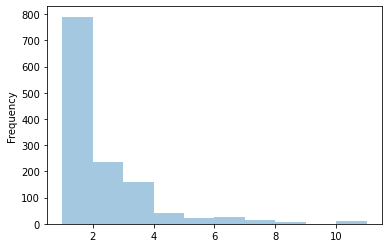

In [62]:
#
df_all['Family_size']=df_all['SibSp']+df_all['Parch']+1
#
df_all['Family_size'].plot.hist(alpha=0.4)

In [63]:
#
df_all['Family_size_bin']=df_all['Family_size'].map(lambda s:1 if s==1 else(2 if s==2 else(3 if 3<=s<=4 else(4 if s>=5 else 0))))

#
df_all['Family_size_bin'].value_counts()

1    790
2    235
3    202
4     82
Name: Family_size_bin, dtype: int64

<AxesSubplot:title={'center':'Survival_mean_with_Family_size_bin'}, xlabel='Family_size_bin'>

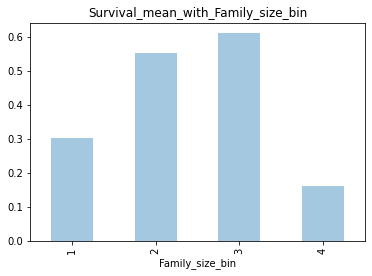

In [64]:
#
df_all[['Family_size_bin','Survived']].groupby('Family_size_bin')['Survived'].mean().plot(kind='bar',alpha=0.4,title='Survival_mean_with_Family_size_bin')
#plt.xlabel('Family_size_bin')
#plt.ylabel('Survival_mean')

###############################################################################################################################################  pd plot with title
#boston_df['AGE'].plot.hist(title='Proportion of owner-occupied units built prior to 1940')

#
#df_all.groupby('Family_size_bin')['Survived'].mean().plot(kind='bar',alpha=0.4)

In [65]:
#### 3 Creat new features out of existing variables
### Tickets


In [66]:
#
df_all['Ticket_frequency']=df_all.groupby('Ticket')['Ticket'].transform('count')
#JHU count same Ticket_id number, why there are same id ticket? in same Cabin or???
#df_all['Ticket_frequency']=df_all.groupby('Ticket')['Ticket'].apply('count')

###JHU
df_all['Ticket_frequency'].sample(5)

444     1
696     1
851     1
1040    2
1082    1
Name: Ticket_frequency, dtype: int64

In [67]:
#df_all[['Ticket_frequency','Survived']].groupby('Ticket_frequency').mean()

df_all.groupby('Ticket_frequency')['Survived'].mean()

Ticket_frequency
1     0.270270
2     0.513812
3     0.653465
4     0.727273
5     0.333333
6     0.210526
7     0.208333
8     0.384615
11    0.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Ticket_frequency'>

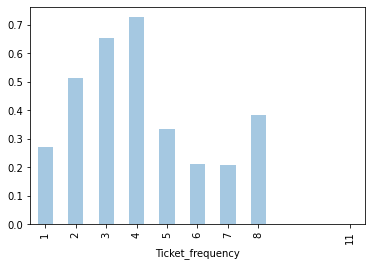

In [68]:
#
#df_all[['Ticket_frequency','Survived']].groupby('Ticket_frequency')['Survived'].mean().plot(kind='bar',alpha=0.4)

df_all.groupby('Ticket_frequency')['Survived'].mean().plot(kind='bar',alpha=0.4)

In [69]:
#### 3.2 Creat new features out of existing variables 
### Title


In [70]:
###JHU

df_all.sample(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Family_size,Family_size_bin,Ticket_frequency
629,<32,NaN,Q,<7.8,"O'Connell, Mr. Patrick D",0,630,3,male,0,0.0,334912,F,1,1,1
1134,<32,NaN,S,<10.5,"Hyman, Mr. Abraham",0,1135,3,male,0,NaN,3470,G,1,1,1
603,<48,NaN,S,<10.5,"Torber, Mr. Ernst William",0,604,3,male,0,0.0,364511,G,1,1,1
1246,<64,E60,S,<41.5,"Julian, Mr. Henry Forbes",0,1247,1,male,0,NaN,113044,E,1,1,1
935,<48,D19,S,<512.3,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",0,936,1,female,1,NaN,11753,D,2,2,2


In [71]:
##########################################################################################################################   get the Mr out of whole string value

df_all['Title']=df_all['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]

df_all['Is_married']=0
df_all['Is_married'].loc[df_all['Title']=='Mrs']=1   ################################################################# we dont need this married or not feature

df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1309 non-null   category
 1   Cabin             295 non-null    object  
 2   Embarked          1309 non-null   object  
 3   Fare              1309 non-null   category
 4   Name              1309 non-null   object  
 5   Parch             1309 non-null   int64   
 6   PassengerId       1309 non-null   int64   
 7   Pclass            1309 non-null   int64   
 8   Sex               1309 non-null   object  
 9   SibSp             1309 non-null   int64   
 10  Survived          891 non-null    float64 
 11  Ticket            1309 non-null   object  
 12  Deck              1309 non-null   object  
 13  Family_size       1309 non-null   int64   
 14  Family_size_bin   1309 non-null   int64   
 15  Ticket_frequency  1309 non-null   int64   
 16  Title             1309 n

/home/marry/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [72]:
###JHU

df_all['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [73]:

df_all['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
Capt              1
Don               1
Dona              1
Mme               1
Lady              1
Jonkheer          1
the Countess      1
Sir               1
Name: Title, dtype: int64

In [74]:
########################################################################################################################################### true or false feedback ??????

title_names=(df_all['Title'].value_counts()<10)

df_all['Title']=df_all['Title'].apply(lambda x:'Mice' if title_names.loc[x]==True else x)

df_all.groupby('Title')['Title'].count()

Title
Master     61
Mice       34
Miss      260
Mr        757
Mrs       197
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title'>

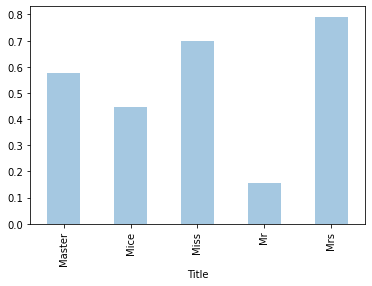

In [75]:
###JHU
df_all[['Title','Survived']].groupby('Title')['Survived'].mean().plot(kind='bar',alpha=0.4)

#df_all.groupby('Title')['Survived'].mean().plot(kind='bar',alpha=0.4)

In [76]:
#### 3 Creat new features out of existing variables 
### Survival Rates


In [77]:

df_all.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Family_size,Family_size_bin,Ticket_frequency,Title,Is_married
0,<32,NaN,S,<7.8,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,F,2,2,1,Mr,0
1,<48,C85,C,<512.3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C,2,2,2,Mrs,1
2,<32,NaN,S,<10.5,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,G,1,1,1,Miss,0


In [78]:
import string

def extract_surname(data):
    families=[]
    for i in range(len(data)):
        name=data.iloc[i]
        if '(' in name:
            name_no_bracket=name.split('(')[0]
        else:
            name_no_bracket=name   # redundant code 
        family=name_no_bracket.split(',')[0]
        #title=name_no_bracket.split(',')[1].strip().split(' ')[0]    #JHU not necessary code
        #for c in string.punctuation:
            #family=family.replace(c,'').strip()
        families.append(family)
    return families

df_all['Family']=extract_surname(df_all['Name'])

In [79]:
df_all['Family'].nunique()


875

In [80]:
df_all['Family'].head(5)

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Family, dtype: object

In [81]:
df_all[['Title','Survived','Family_size']].groupby('Title').mean()

###JHU THINK & PRACTICE

,Survived,Family_size
Title,,
Master,0.575000,4.426230
Mice,0.444444,1.441176
Miss,0.697802,2.169231
Mr,0.156673,1.442536
Mrs,0.792000,2.492386


Survival_rates_grouped_by_families_of_women_in_dataset:


<AxesSubplot:xlabel='Family_size'>

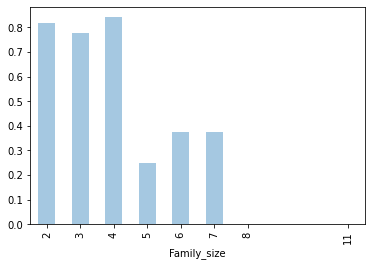

In [82]:
print("Survival_rates_grouped_by_families_of_women_in_dataset:")
#df_all.loc[(df_all['Sex']=='female')&(df_all['Family_size']>1)].groupby('Family')['Survived'].mean().plot.hist(alpha=0.4)

###################################################################################################################################################### less children ones survive
df_all.loc[(df_all['Sex']=='female')&(df_all['Family_size']>1)].groupby('Family_size')['Survived'].mean().plot(kind='bar',alpha=0.4)

#df.loc[(df['First_name'] != 'Bill') & (df['First_name'] != 'Emma'), 'name_match'] = 'Mismatch'     #'name_mach' is new named column

#df_all[(df_all['Sex']=='female')&(df_all['Family_size']>1)].groupby('Family')['Survived'].mean().plot.hist(alpha=0.4)

<AxesSubplot:xlabel='Family_size'>

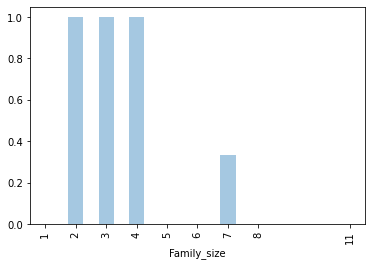

In [83]:
#
master_families=df_all[df_all['Title']=='Master']['Family'].tolist()
#df_all.loc[df_all['Family'].isin(master_families)].groupby('Family_size')['Survived'].mean().plot.hist(alpha=0.4)

############################################################################################################################################# pointless Master family  drop
df_all.loc[(df_all['Title']=='Master')].groupby('Family_size')['Survived'].mean().plot(kind='bar',alpha=0.4)

In [84]:

df_all.head(1)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Family_size,Family_size_bin,Ticket_frequency,Title,Is_married,Family
0,<32,NaN,S,<7.8,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,F,2,2,1,Mr,0,Braund


In [85]:
#Create variables with the survival rate of the women and masters

############################################################################################################################################ borrowed below
women_rate=df_all.loc[(df_all['Sex']=='female')&(df_all['Family_size']>1)].groupby('Family')['Survived'].mean()
#
#master_rate=df_all.loc[df_all['Family'].isin(master_families)].groupby('Family')['Survived'].mean()     ###JHU we should remove column 7 and to use it seperately if we insist 

#Combine two series
#combined_rate=women_rate.append(master_rate)

#It is posible that a woman has the family as a master and vice versa, so duplicates have to been dropped
#combined_rate_df=combined_rate.to_frame().reset_index().rename(columns={'Survived':'Survival_quota'}).drop_duplicates(subset='Family')
#
combined_rate_df=women_rate.to_frame().reset_index().rename(columns={'Survived':'Survival_quota'}).drop_duplicates(subset='Family')      ###################?????????????  


#Merge the new dataframe
df_all=pd.merge(df_all,combined_rate_df,how='left')     ###################?????????????    or not use women rate too???

In [86]:
#########################################################################################################################################################
#JHU use mother_rate no other master mother or something        my poor code capability.........

#mother_rate_1=df_all.loc[(df_all['Sex']=='female')&(df_all['Family_size']>1)&(df_all['Family_size']<=4)].groupby('Family')['Survived'].mean()
#mother_rate_2=df_all.loc[(df_all['Sex']=='female')&(df_all['Family_size']>4)&(df_all['Family_size']<=7)].groupby('Family')['Survived'].mean()
#mother_rate_3=df_all.loc[(df_all['Sex']=='female')&(df_all['Family_size']>7)].groupby('Family')['Survived'].mean()

#df_all=pd.merge(df_all,mother_rate_1,mother_rate_2,mother_rate_3,how='left')


In [87]:
df_all_1=pd.merge(df_all,women_rate,how='left')
df_all.head(1)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Family_size,Family_size_bin,Ticket_frequency,Title,Is_married,Family,Survival_quota
0,<32,NaN,S,<7.8,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,F,2,2,1,Mr,0,Braund,NaN


In [88]:
#We have calculated a survival rate for only a part of the cases, the others 
#we set to 0 in the dummy variable

df_all['Survival_quota_NA']=1
df_all.loc[df_all['Survival_quota'].isnull(),'Survival_quota_NA']=0
df_all['Survival_quota']=df_all['Survival_quota'].fillna(0)

In [89]:
#### 3.3 Label and One Hot Encoding


In [90]:
print(df_all.head())

   Age Cabin Embarked    Fare  \
0  <32   NaN        S    <7.8   
1  <48   C85        C  <512.3   
2  <32   NaN        S   <10.5   
3  <48  C123        S  <512.3   
4  <48   NaN        S   <10.5   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  ...            Ticket Deck Family_size  \
0       3    male      1  ...         A/5 21171    F           2   
1       1  female      1  ...          PC 17599    C           2   
2       3  female      0  ...  STON/O2. 3101282    G           1   
3       1  female      1  ...            113803    C           2   
4   

In [91]:
from sklearn import preprocessing

non_numeric_features=['Embarked','Sex','Title','Age','Fare','Deck']

for feature in non_numeric_features:
    df_all[feature]=preprocessing.LabelEncoder().fit_transform(df_all[feature])
    

cat_features=['Pclass','Sex','Embarked','Title','Deck','Family_size_bin','Age','Fare'] ############################################################3
    
encoded_features=[]

for feature in cat_features:
    encoded_feat=preprocessing.OneHotEncoder().fit_transform(df_all[feature].values.reshape(-1,1)).toarray()
    n=df_all[feature].nunique()
    cols=['{}_{}'.format(feature,n) for n in range(1,n+1)]
    encoded_df=pd.DataFrame(encoded_feat,columns=cols)
    encoded_df.index=df_all.index
    encoded_features.append(encoded_df)

df_all=pd.concat([df_all,*encoded_features],axis=1)

In [92]:
print(df_all.head())

   Age Cabin  Embarked  Fare  \
0    1   NaN         2     4   
1    2   C85         0     3   
2    1   NaN         2     0   
3    2  C123         2     3   
4    2   NaN         2     0   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  ...  Age_1 Age_2  Age_3  Age_4  Age_5  Fare_1  Fare_2  \
0       3    1      1  ...    0.0   1.0    0.0    0.0    0.0     0.0     0.0   
1       1    0      1  ...    0.0   0.0    1.0    0.0    0.0     0.0     0.0   
2       3    0      0  ...    0.0   1.0    0.0    0.0    0.0     1.0     0.0   
3       1    0      1  ...    

In [93]:
df_train,df_test=divide_df(df_all)

In [94]:
#Defined columns which can be dropped for the modeling part because we 
#created new lable and one hot encoded variants out of them

drop_cols=['Embarked','Family','Survived','Family_size','Family_size_bin',
           'Deck','Age','Name','Parch','PassengerId','Pclass','Sex','SibSp',
           'Title','Ticket','Cabin']

drop_cols_2=['Embarked','Family','Family_size','Family_size_bin','Deck','Fare',
            'Name','Parch','PassengerId','Pclass','Sex','SibSp','Title',
             'Ticket','Cabin']

In [95]:
#setting up a random forest classifier
#standardization of variables

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
###JHU from sklearn.preprocessing import StandardScaler

x=preprocessing.StandardScaler().fit_transform(df_train.drop(columns=drop_cols))    ###################
y=df_train['Survived'].values

x_test=preprocessing.StandardScaler().fit_transform(df_test.drop(columns=drop_cols_2))

#creating train, test splits
x_train,x_test1,y_train,y_test1=train_test_split(x,y,test_size=0.25,random_state=42)

#defining model parameters
model=RandomForestClassifier(criterion='gini',
                                          n_estimators=1750,
                                          max_depth=7,
                                          min_samples_split=6,
                                          min_samples_leaf=6,
                                          max_features="auto",
                                          oob_score=True,
                                          random_state=42,
                                          n_jobs=-1,
                                          verbose=1)

model.fit(x_train,y_train)
predictions=model.predict(x_test)
#print(model.score(x_test1,y_test1))
output=pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':predictions})
output['Survived']=output['Survived'].astype(int)
output.to_csv('2020_00_09_titanic_jjj.csv',index=False)
print(model.score(x_test1,y_test1))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 444 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 794 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1244 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    4.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 1750 out of 1750 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent worker

0.8654708520179372


[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 1750 out of 1750 | elapsed:    0.3s finished
